<a href="https://colab.research.google.com/github/angelareis/Projeto_Mocoia/blob/main/API_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agenda

* Definição de API
* HTTP
* JSON

## Definição de API

>In computing, an **application programming interface** (API) is an interface that defines interactions between multiple software applications or mixed hardware-software intermediaries. It defines the kinds of calls or requests that can be made, how to make them, the data formats that should be used, the conventions to follow, etc. Fonte: Wikipedia

Ou seja, API é uma maneira de interagir com outros softwares através de requisições seguindo um conjunto de convenções sobre o formato do dado, parâmetros da requisição, etc

## Tipos de API

APIs podem ser de diversos tipos:
* Hardware: Interfaceiam com algum dispositivo de hardware. Exemplo: DirectX, OpenGL e CUDA.
* Sistemas Operacionais: POSIX, WINAPI
* Bibliotecas: A interface que expõe a parte interna da biblioteca é uma API
* WEB: Utilizam o protocolo HTTP e transferem as informações em texto (XML, JSON)

Nosso interesse nessa aula é nas **APIs WEB para coletar dados**. 
Nesta aula vamos aprender os conceitos fundamentais para **usar** estas APIs.
Ao longo do curso vamos aprender como **criar** uma API.

## Característica das API WEB

* Cliente - Servidor
* Utilizam protocolo HTTP
* Os dados são transferidos em XML/JSON/YAML

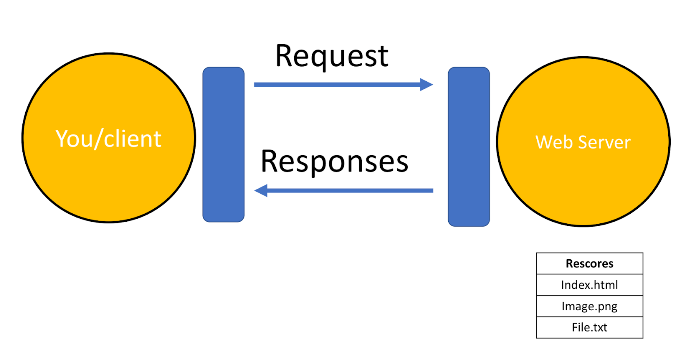

## Exemplo de Mensagem HTTP

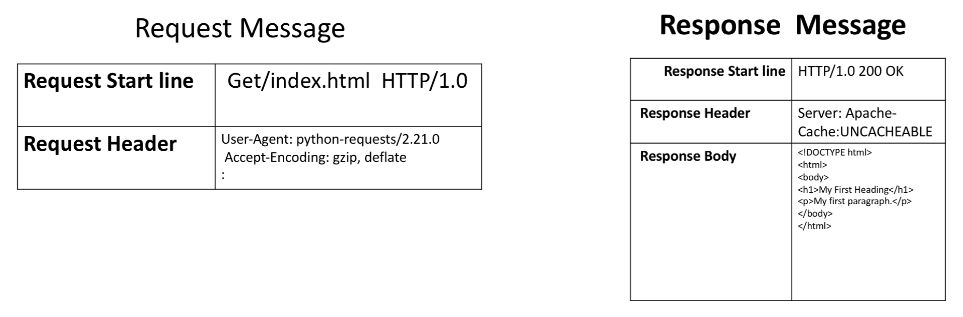

## Comandos do Protocolo HTTP

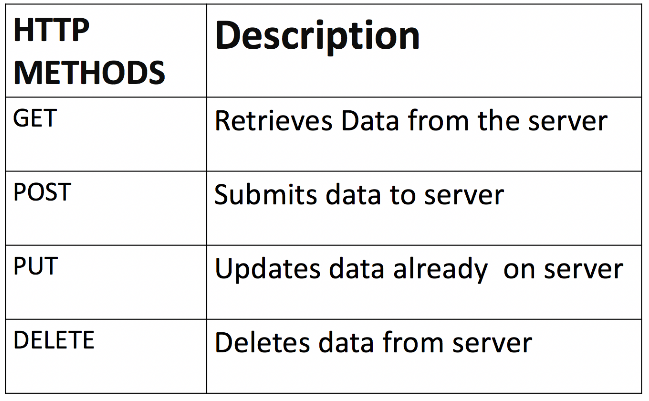

## Status da Requisição

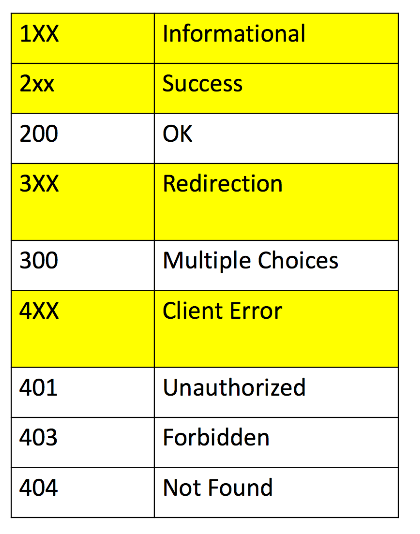

# Porque usar WEB APIs ?

* Fácil de integrar com outros sistemas
* Não depende de uma linguagem específica, plugins, etc
* Fácil de escalar
* Protocolo onipresente (http)
* Permite o desenvolvimento de um ecossistema de aplicativos


## Como usa ?

Vamos usar APIs web através da biblioteca requests. O passo a passo para usar uma API é

1. Ler a documentação da API para saber qual a URL/endpoints/parâmetros
2. Fazer a requisição usando requests.get() ou requests.post()
3. Avaliar a resposta

Algumas APIs, principalmente as pagas, precisam que você faça algum tipo de autenticação, criando um usuário. Nessas APIs, é necessário que a primeira requisição seja a que faz a autenticação. A resposta dessa autenticação vai ser um token de acesso, que deve ser passado em todas as outras requisições seguintes.

Vamos começar com uma API que não precisa de autenticação e depois vamos ver outras que precisam.

## A classe Response

Possui os atributos: 
* content: o conteúdo da resposta no formado bytes.
* text: o conteúdo da resposta em string (unicode)
* status_code

E um método bastante útil:
* json(): transforma a resposta em um dicionário

## json ???

JSON (JavaScript Object Notation) is an open standard file format and data interchange format that uses human-readable text to store and transmit data objects consisting of attribute–value pairs and arrays (or other serializable values). It is a common data format with diverse uses in electronic data interchange, including that of web applications with servers. [Wikipedia](https://en.wikipedia.org/wiki/JSON)

# Passando Parâmetros no GET

De acordo com a documentação da API, o endpoint iss_pass aceita alguns parâmetros no GET:

https://open-notify-api.readthedocs.io/en/latest/iss_pass.html

Podemos passar esses parâmetros tanto da string da requisição (chamado de query parameters) e através do método get().

# Passando parametros no body da mensagem

Segundo a especificação do protocolo HTTP, o método POST (e também o PUT) passam parâmetros dentro do corpo da mensagem e não podem passar na URL. 



# Exemplo Twitter API

In [ ]:
client_key = 'klF4aF9h09iLeUUwboFIFn3Dl'
client_secret = 'NCu35oEQ2iLFfIIJlHIkYQWrkvyoG4pqmR9C0OE0QuvpyEeEVB'

import base64

key_secret = '{}:{}'.format(client_key, client_secret).encode('ascii')
b64_encoded_key = base64.b64encode(key_secret)
b64_encoded_key = b64_encoded_key.decode('ascii')

In [ ]:
b64_encoded_key

'a2xGNGFGOWgwOWlMZVVVd2JvRklGbjNEbDpOQ3UzNW9FUTJpTEZmSUlKbEhJa1lRV3JrdnlvRzRwcW1SOUMwT0UwUXV2cHlFZUVWQg=='

https://developer.twitter.com/en/docs/authentication/api-reference/token

In [ ]:
base_url = 'https://api.twitter.com/'
auth_url = 'https://api.twitter.com/oauth2/token'

auth_headers = {
    'Authorization': 'Basic {}'.format(b64_encoded_key),
    'Content-Type': 'application/x-www-form-urlencoded;charset=UTF-8'
}

auth_data = {
    'grant_type': 'client_credentials'
}

auth_resp = requests.post(auth_url, headers=auth_headers, params=auth_data)

https://developer.twitter.com/en/docs/twitter-api/v1/tweets/search/api-reference/get-search-tweets